<a href="https://colab.research.google.com/github/cbishop4/MSE7530/blob/main/ClassNotebooks/PeakLineshapes_20251203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
%matplotlib inline

# Single Gaussian Peak Fitting

In [2]:
# linearly spaced x-axis of 10 values between 1 and 10
x_array = np.linspace(1,100,50)

amp1 = 100
sigma1 = 10
cen1 = 50
y_array_gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

# creating some noise to add the the y-axis data
y_noise_gauss = (np.exp((np.random.ranf(50))))/5
y_array_gauss += y_noise_gauss

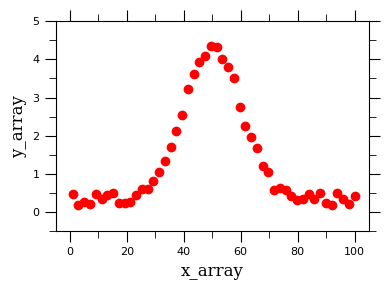

In [3]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("rawGaussian.png", format="png",dpi=1000)

In [4]:
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2)))

In [5]:
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, x_array, y_array_gauss, p0=[amp1, cen1, sigma1])

perr_gauss = np.sqrt(np.diag(pcov_gauss))

In [6]:
# this cell prints the fitting parameters with their errors
print "amplitude = %0.2f (+/-) %0.2f" % (popt_gauss[0], perr_gauss[0])
print "center = %0.2f (+/-) %0.2f" % (popt_gauss[1], perr_gauss[1])
print "sigma = %0.2f (+/-) %0.2f" % (popt_gauss[2], perr_gauss[2])

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (ipython-input-3835400819.py, line 2)

/tmp/ipython-input-3713208152.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="best")


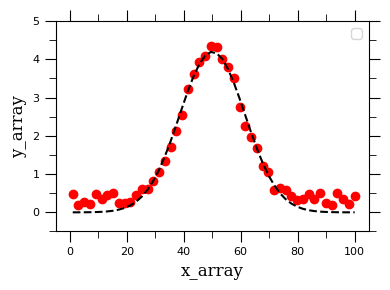

In [7]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_gauss, "ro")
ax1.plot(x_array, _1gaussian(x_array, *popt_gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fitGaussian.png", format="png",dpi=1000)

# Multiple Gaussian Peak Fitting

In [8]:
amp1 = 100
sigma1 = 10
cen1 = 40

amp2 = 75
sigma2 = 5
cen2 = 65

y_array_2gauss = amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
                amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

# creating some noise to add the the y-axis data
y_noise_2gauss = (np.exp((np.random.ranf(50))))/5
y_array_2gauss += y_noise_2gauss

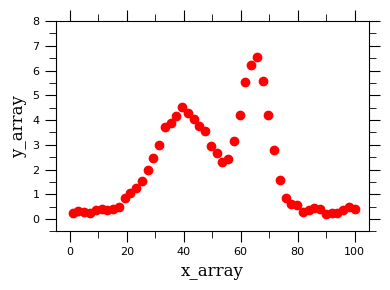

In [9]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2gauss, "ro")

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,8)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("raw2Gaussian.png", format="png",dpi=1000)

In [10]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x_array-cen2)/sigma2)**2)))

In [11]:
popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array_2gauss, p0=[amp1, cen1, sigma1, \
                                                                                          amp2, cen2, sigma2])

perr_2gauss = np.sqrt(np.diag(pcov_2gauss))

pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(x_array, *pars_1)
gauss_peak_2 = _1gaussian(x_array, *pars_2)

/tmp/ipython-input-3612313691.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="best")


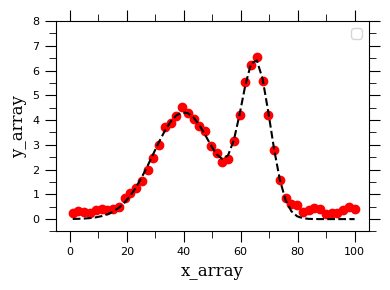

In [12]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2gauss, "ro")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,8)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian.png", format="png",dpi=1000)

/tmp/ipython-input-3093843469.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="best")


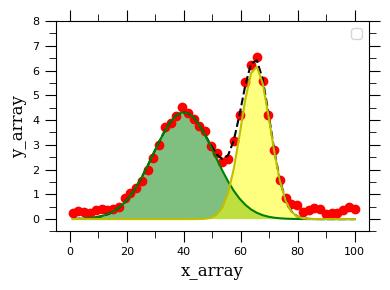

In [13]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_2gauss, "ro")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)

# peak 2
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,8)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian_peaks.png", format="png",dpi=1000)

In [14]:
# this cell prints the fitting parameters with their errors
print "-------------Peak 1-------------"
print "amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_2gauss[0])
print "center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1])
print "sigma = %0.2f (+/-) %0.2f" % (pars_1[2], perr_2gauss[2])
print "area = %0.2f" % np.trapz(gauss_peak_1)
print "--------------------------------"
print "-------------Peak 2-------------"
print "amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_2gauss[3])
print "center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4])
print "sigma = %0.2f (+/-) %0.2f" % (pars_2[2], perr_2gauss[5])
print "area = %0.2f" % np.trapz(gauss_peak_2)
print "--------------------------------"

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (ipython-input-3699861299.py, line 2)

In [15]:
residual_2gauss = y_array_2gauss - (_2gaussian(x_array, *popt_2gauss))

/tmp/ipython-input-3827945322.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc="best")


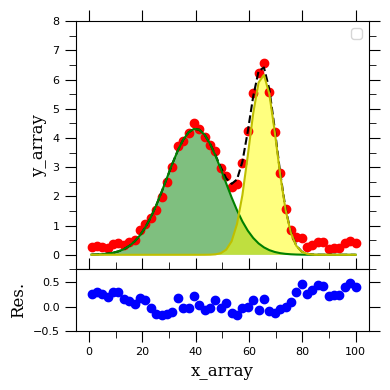

In [16]:
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0)

ax1.plot(x_array, y_array_2gauss, "ro")
ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, gauss_peak_1, "g")
ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)

# peak 2
ax1.plot(x_array, gauss_peak_2, "y")
ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)

# residual
ax2.plot(x_array, residual_2gauss, "bo")

ax1.set_xlim(-5,105)
ax1.set_ylim(-0.5,8)

ax2.set_xlim(-5,105)
ax2.set_ylim(-0.5,0.75)

ax2.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)
ax2.set_ylabel("Res.",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.tick_params(axis='x',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='x',which='minor', direction="out", top="on", right="on", bottom="off", length=5, labelsize=8)
ax1.tick_params(axis='y',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='y',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

ax2.tick_params(axis='x',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='x',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)
ax2.tick_params(axis='y',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='y',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit2Gaussian_peaks_resid.png", format="png",dpi=1000)

# Lorentzian Peak Fitting

In [ ]:
x_array = np.linspace(1,300,250)

amp1 = 50
cen1 = 100
wid1 = 5

amp2 = 100
cen2 = 150
wid2 = 10

amp3 = 50
cen3 = 200
wid3 = 5

y_array_3lorentz = (amp1*wid1**2/((x_array-cen1)**2+wid1**2)) + \
                    (amp2*wid2**2/((x_array-cen2)**2+wid2**2)) +\
                     (amp3*wid3**2/((x_array-cen3)**2+wid3**2))

# creating some noise to add the the y-axis data
y_noise_3lorentz = (((np.random.ranf(250))))*5
y_array_3lorentz += y_noise_3lorentz

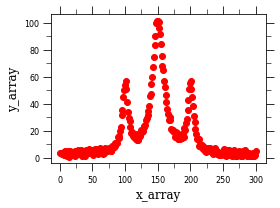

In [ ]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_3lorentz, "ro")

#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("raw_3Lorentz.png", format="png",dpi=1000)

In [ ]:
def _1Lorentzian(x, amp, cen, wid):
    return amp*wid**2/((x-cen)**2+wid**2)

def _3Lorentzian(x, amp1, cen1, wid1, amp2,cen2,wid2, amp3,cen3,wid3):
    return (amp1*wid1**2/((x-cen1)**2+wid1**2)) +\
            (amp2*wid2**2/((x-cen2)**2+wid2**2)) +\
                (amp3*wid3**2/((x-cen3)**2+wid3**2))

In [ ]:
popt_3lorentz, pcov_3lorentz = scipy.optimize.curve_fit(_3Lorentzian, x_array, y_array_3lorentz, p0=[amp1, cen1, wid1, \
                                                                                    amp2, cen2, wid2, amp3, cen3, wid3])

perr_3lorentz = np.sqrt(np.diag(pcov_3lorentz))

pars_1 = popt_3lorentz[0:3]
pars_2 = popt_3lorentz[3:6]
pars_3 = popt_3lorentz[6:9]
lorentz_peak_1 = _1Lorentzian(x_array, *pars_1)
lorentz_peak_2 = _1Lorentzian(x_array, *pars_2)
lorentz_peak_3 = _1Lorentzian(x_array, *pars_3)

In [ ]:
# this cell prints the fitting parameters with their errors
print "-------------Peak 1-------------"
print "amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_3lorentz[0])
print "center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_3lorentz[1])
print "width = %0.2f (+/-) %0.2f" % (pars_1[2], perr_3lorentz[2])
print "area = %0.2f" % np.trapz(lorentz_peak_1)
print "--------------------------------"
print "-------------Peak 2-------------"
print "amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_3lorentz[3])
print "center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_3lorentz[4])
print "width = %0.2f (+/-) %0.2f" % (pars_2[2], perr_3lorentz[5])
print "area = %0.2f" % np.trapz(lorentz_peak_2)
print "--------------------------------"
print "-------------Peak 3-------------"
print "amplitude = %0.2f (+/-) %0.2f" % (pars_3[0], perr_3lorentz[6])
print "center = %0.2f (+/-) %0.2f" % (pars_3[1], perr_3lorentz[7])
print "width = %0.2f (+/-) %0.2f" % (pars_3[2], perr_3lorentz[8])
print "area = %0.2f" % np.trapz(lorentz_peak_3)
print "--------------------------------"

-------------Peak 1-------------
amplitude = 50.27 (+/-) 1.10
center = 99.89 (+/-) 0.12
width = 5.65 (+/-) 0.18
area = 722.84
--------------------------------
-------------Peak 2-------------
amplitude = 99.92 (+/-) 0.81
center = 150.06 (+/-) 0.09
width = 10.59 (+/-) 0.13
area = 2644.58
--------------------------------
-------------Peak 3-------------
amplitude = 51.26 (+/-) 1.11
center = 200.05 (+/-) 0.12
width = 5.62 (+/-) 0.18
area = 733.18
--------------------------------


In [ ]:
residual_3lorentz = y_array_3lorentz - (_3Lorentzian(x_array, *popt_3lorentz))

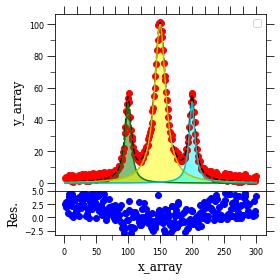

In [ ]:
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0)

ax1.plot(x_array, y_array_3lorentz, "ro")
ax1.plot(x_array, _3Lorentzian(x_array, *popt_3lorentz), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, lorentz_peak_1, "g")
ax1.fill_between(x_array, lorentz_peak_1.min(), lorentz_peak_1, facecolor="green", alpha=0.5)

# peak 2
ax1.plot(x_array, lorentz_peak_2, "y")
ax1.fill_between(x_array, lorentz_peak_2.min(), lorentz_peak_2, facecolor="yellow", alpha=0.5)

# peak 3
ax1.plot(x_array, lorentz_peak_3, "c")
ax1.fill_between(x_array, lorentz_peak_3.min(), lorentz_peak_3, facecolor="cyan", alpha=0.5)

# residual
ax2.plot(x_array, residual_3lorentz, "bo")

#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,8)

#ax2.set_xlim(-5,105)
#ax2.set_ylim(-0.5,0.75)

ax2.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)
ax2.set_ylabel("Res.",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.tick_params(axis='x',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='x',which='minor', direction="out", top="on", right="on", bottom="off", length=5, labelsize=8)
ax1.tick_params(axis='y',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='y',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

ax2.tick_params(axis='x',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='x',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)
ax2.tick_params(axis='y',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='y',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit3Lorentzian_peaks_resid.png", format="png",dpi=1000)

# Voigt Peak Fitting

In [ ]:
x_array = np.linspace(1,100,50)

ampG1 = 20
cenG1 = 50
sigmaG1 = 5
ampL1 = 80
cenL1 = 50
widL1 = 5

y_array_voigt = (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x_array-cenG1)**2)/((2*sigmaG1)**2)))) +\
                ((ampL1*widL1**2/((x_array-cenL1)**2+widL1**2)) )

# creating some noise to add the the y-axis data
y_noise_voigt = (((np.random.ranf(50))))*5
y_array_voigt += y_noise_voigt

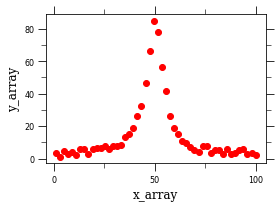

In [ ]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_array, y_array_voigt, "ro")

#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,5)

ax1.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(50))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("raw_voigt.png", format="png",dpi=1000)

In [ ]:
def _1Voigt(x, ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\
              ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )

In [ ]:
popt_1voigt, pcov_1voigt = scipy.optimize.curve_fit(_1Voigt, x_array, y_array_voigt, p0=[ampG1, cenG1, sigmaG1, \
                                                                                         ampL1, cenL1, widL1])

perr_1voigt = np.sqrt(np.diag(pcov_1voigt))

pars_1 = popt_1voigt
voigt_peak_1 = _1Voigt(x_array, *pars_1)

In [ ]:
residual_1voigt = y_array_voigt - (_1Voigt(x_array, *popt_1voigt))

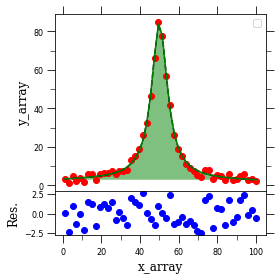

In [ ]:
fig = plt.figure(figsize=(4,4))
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.25])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0)

ax1.plot(x_array, y_array_voigt, "ro")
ax1.plot(x_array, _1Voigt(x_array, *popt_1voigt), 'k--')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

# peak 1
ax1.plot(x_array, voigt_peak_1, "g")
ax1.fill_between(x_array, voigt_peak_1.min(), voigt_peak_1, facecolor="green", alpha=0.5)

# residual
ax2.plot(x_array, residual_1voigt, "bo")

#ax1.set_xlim(-5,105)
#ax1.set_ylim(-0.5,8)

#ax2.set_xlim(-5,105)
#ax2.set_ylim(-0.5,0.75)

ax2.set_xlabel("x_array",family="serif",  fontsize=12)
ax1.set_ylabel("y_array",family="serif",  fontsize=12)
ax2.set_ylabel("Res.",family="serif",  fontsize=12)

ax1.legend(loc="best")

ax1.xaxis.set_major_locator(ticker.MultipleLocator(20))
#ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))

ax2.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))

ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax1.tick_params(axis='x',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='x',which='minor', direction="out", top="on", right="on", bottom="off", length=5, labelsize=8)
ax1.tick_params(axis='y',which='major', direction="out", top="on", right="on", bottom="off", length=8, labelsize=8)
ax1.tick_params(axis='y',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

ax2.tick_params(axis='x',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='x',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)
ax2.tick_params(axis='y',which='major', direction="out", top="off", right="on", bottom="on", length=8, labelsize=8)
ax2.tick_params(axis='y',which='minor', direction="out", top="off", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig("fit1Voigt_peaks_resid.png", format="png",dpi=1000)

In [ ]:
ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1

(20, 50, 5, 80, 50, 5)

In [ ]:
print "gauss. weight = %0.2f" % ((pars_1[0]/(pars_1[0]+pars_1[3]))*100)
print "lorentz. weight = %0.2f" % ((pars_1[3]/(pars_1[0]+pars_1[3]))*100)

gauss. weight = 82.82
lorentz. weight = 17.18
